In [2]:
import math
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import rebound as rb

In [9]:
# tuples are of order (e_b, a_p) binary eccentricity and planetary semi-major axis

f_plan = np.random.rand()*2*np.pi
tup_num = 7
e_b = np.linspace(0, 0.7, tup_num)
a_p = np.linspace(1, 5, tup_num)
Np = 10
tup_list = []

for e in e_b:
    for a in a_p:
        tup_list.append((e,a,Np))

def survival(initial):    
    (eb, ap, Np) = initial

    sim = rb.Simulation()
    sim.add(m=1, hash="Binary 1")
    sim.add(m=1, a=1, e= eb, hash="Binary 2", f = f_plan)
    
    #initializing Np massless planets
    for p in range(Np):
        sim.add(a= ap, e=0, hash="Test Planet", f= f_plan)
    
    #array to keep track of survival times
    surv = np.zeros([Np])
    
    sim.integrator = "whfast"
    sim.move_to_com()
    
    #integrate
    N_times = int(1e4)
    N_orbit = (500)*2*np.pi
    times = np.linspace(0, N_orbit, N_times)
    
    for i, time in enumerate(times):
        if i == N_times/10:
            print(time)
            #print(f't={time/2/np.pi:.2f}') #let me know things are going well
        sim.integrate(time, exact_finish_time=0)
            
        a_bin = sim.particles[1].a
        for j,p in enumerate(sim.particles[2:]):                  
            
            #for plan in range(2, Np + 1):
                #p = sim.particles[plan]
           
            #p = sim.particles[2]
            
            #a_bin = sim.particles[1].a
            
                #if (p.x**2 + p.y**2) > (100*a_bin)**2:
                    #surv[j] = time
                    #print(f'removing planet {j+2}')
                    #sim.remove(j+2) 
                    
            if (p.x**2 + p.y**2) > (100*a_bin)**2:
                surv[j] = time
                print(f'removing planet {j+2}')
                sim.remove(j+2) 
                
        # if all particles have been ejected, end integration
        if len(sim.particles)==2:
            break
    surv[(surv==0)] = time
    
    print(f'simulation finished, {len(sim.particles)-2} planets remaining')
    return np.mean(surv)
   

In [10]:
%%time
pool = rb.InterruptiblePool()
mapping = pool.map(func= survival, iterable= tup_list)

314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
314.190684427422
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets remaining
simulation finished, 10 planets rema

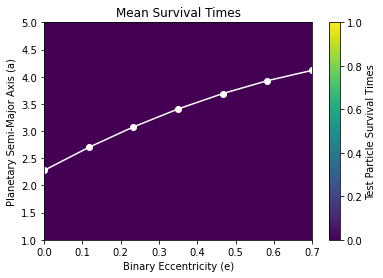

In [11]:
fig = plt.figure()
figure = np.reshape(mapping, [tup_num,tup_num])

plt.pcolormesh(e_b, a_p, figure.T, shading='auto')
plt.title('Mean Survival Times')
plt.xlabel('Binary Eccentricity (e)')
plt.ylabel('Planetary Semi-Major Axis (a)')
plt.xlim(0.0,0.7)
plt.ylim(1,5)

a_b = 2.278 + 3.824*e_b - 1.71*(e_b**2)
plt.plot(e_b, a_b, color='white')
plt.scatter(e_b, a_b, color='white')

plt.colorbar(label='Test Particle Survival Times')

In [ ]:
#dt = np.dtype([
#    ('body_length','<u2'),
#    ('msg_type', '<u2'),
#    ('number', '<i4'),
#    ('name', 'S6')
#])
#with open('eb0.0_ap5.0__Np15.bin', 'rb') as f:
#    b = f.read()
    
#np_data = np.frombuffer(b, dt)
#df = pd.DataFrame(np_data)
#df

#sa = rb.SimulationArchive("eb0.7_ap5.0__Np15.bin")

In [ ]:
sa = rb.SimulationArchive('eb0.0_ap5.0__Np15.bin')
print("Number of snapshots: %d" % len(sa))
print(sa[0].particles[1])

In [ ]:
sa1 = rb.SimulationArchive('eb0.3111111111111111_ap1.8888888888888888__Np15.bin')
print("Number of snapshots: %d" % len(sa1))
print(sa1[0].particles[1])

In [ ]:
10e4

In [ ]:
10e3

In [ ]:
1e4

In [ ]:
#maptup = open('map_tup10.txt', 'r')
#for line in maptup:
#    print(line)
#maptup.close()